# Zomato-Datasets-Insights Anlayzation

#### This project aims to explore the Zomato data to understand top performing area and top_selling food, most revunue given by which area, trend of different restaurent, customer behaviour. The aims is to study how sales strategies can be improved and optimized. 


### Purpose of the Project

#### The major aim of the project is to gain insight into the data of Zomato to understand the different factors that affect of the different branches.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("zomato.csv", encoding= 'latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
[features for features in df.columns if df[features].isnull(). sum() >0]

['Cuisines']

<Axes: >

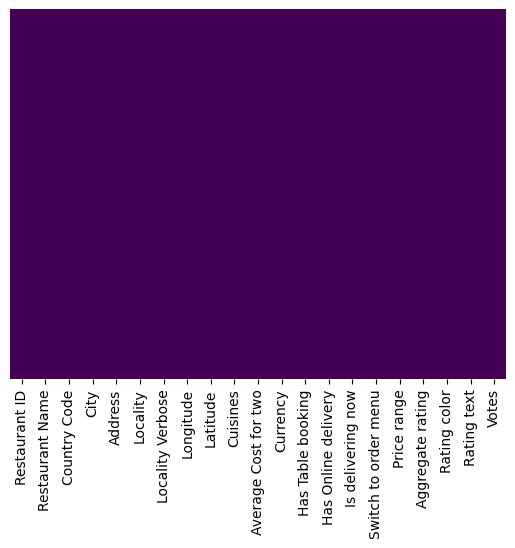

In [6]:
sns.heatmap(df.isnull() , yticklabels=False , cbar=False ,cmap = 'viridis')

In [7]:
df_country = pd.read_excel("Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
final_df= pd.merge(df,df_country,on='Country Code', how = 'left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
country_names=final_df.Country.value_counts().index

In [12]:
values= final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1efc30c97d0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

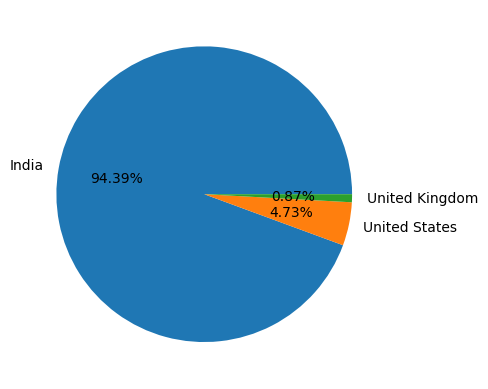

In [13]:
plt.pie(values[:3] , labels = country_names[:3] , autopct = '%1.2f%%')

## observation : Most of the business happens in india

In [14]:
city_orders = final_df.City.value_counts().values
city_names = final_df.City.value_counts().index
city_orders

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

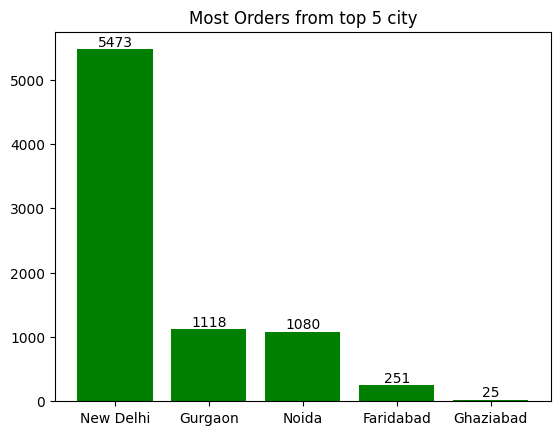

In [15]:
bars = plt.bar(x=city_names[:5], height=city_orders[:5], color='green')
plt.title("Most Orders from top 5 city")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


## observation :  New Delhi has most orders of zomato!

In [16]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

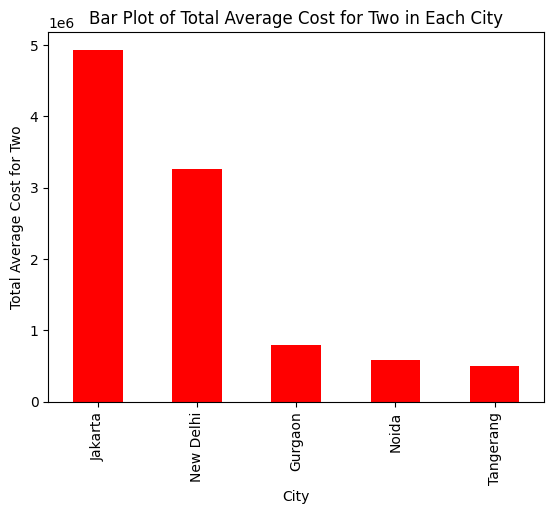

Highest Revenue of Zomato :  City
Jakarta    4935000
Name: Average Cost for two, dtype: int64
Orders for Jakarta: 16


In [17]:
profitable_city = df.groupby('City')['Average Cost for two'].sum().sort_values(ascending= False )
profitable_city[:5].plot(kind='bar', color='red')
plt.xlabel('City')
plt.ylabel('Total Average Cost for Two')
plt.title('Bar Plot of Total Average Cost for Two in Each City')
plt.show()
print("Highest Revenue of Zomato : " , profitable_city[:1])
for city, orders in zip(city_names, city_orders):
    if city == "Jakarta":
        print("Orders for Jakarta:", orders)

## Observation : New Delhi has most orders but most profitable city is Jakarta!!

In [18]:
for city, average in zip(final_df['City'], final_df['Average Cost for two']):
    if city == 'Jakarta':
        print("Jakarta City Wise:", city, average)  

Jakarta City Wise: Jakarta 200000
Jakarta City Wise: Jakarta 165000
Jakarta City Wise: Jakarta 200000
Jakarta City Wise: Jakarta 200000
Jakarta City Wise: Jakarta 800000
Jakarta City Wise: Jakarta 800000
Jakarta City Wise: Jakarta 250000
Jakarta City Wise: Jakarta 200000
Jakarta City Wise: Jakarta 500000
Jakarta City Wise: Jakarta 300000
Jakarta City Wise: Jakarta 450000
Jakarta City Wise: Jakarta 120000
Jakarta City Wise: Jakarta 200000
Jakarta City Wise: Jakarta 100000
Jakarta City Wise: Jakarta 100000
Jakarta City Wise: Jakarta 350000


## Observation :  Jakarta has many different average cost and by this we can say this jakarta suppose to be a good devolped city!!

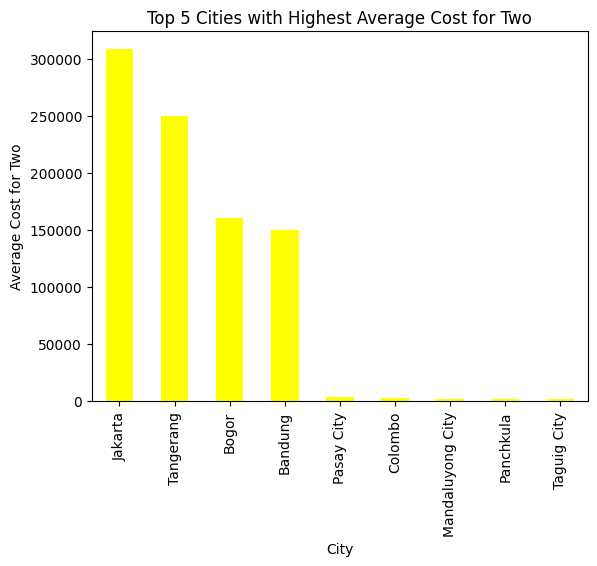

In [19]:
average_cost = final_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)[:9]
average_cost.plot(kind='bar', color='yellow')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.title('Top 5 Cities with Highest Average Cost for Two')
plt.show()


In [20]:
average_cost2 = final_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=True)[:5]
print("Lowest Average Cost")
print(average_cost2)

Lowest Average Cost
City
Miller             0.0
Dicky Beach        7.0
Inverloch          7.0
Lakes Entrance     7.0
Lakeview          10.0
Name: Average Cost for two, dtype: float64


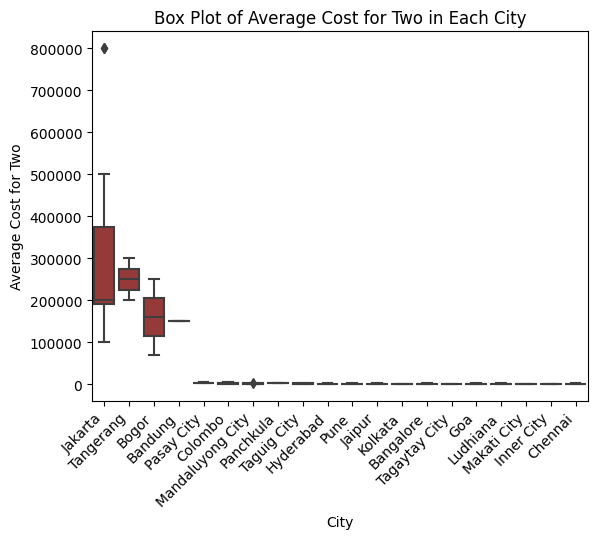

In [21]:
average_cost = final_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)[:20]
sns.boxplot(x=final_df['City'], y=final_df['Average Cost for two'], order=average_cost.index , color ='brown' )


plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.title('Box Plot of Average Cost for Two in Each City')

plt.xticks(rotation=45, ha='right')
# plt.figure(figsize=(32, 15))

plt.show()


In [22]:
most_curr= final_df[['Country', 'Currency']].value_counts().reset_index(name='Count')
print(most_curr)

           Country                Currency  Count
0            India      Indian Rupees(Rs.)   8652
1    United States               Dollar($)    434
2   United Kingdom              Pounds(£)     80
3           Brazil      Brazilian Real(R$)     60
4     South Africa                 Rand(R)     60
5              UAE      Emirati Diram(AED)     60
6      New Zealand           NewZealand($)     40
7           Turkey        Turkish Lira(TL)     34
8        Australia               Dollar($)     24
9      Phillipines        Botswana Pula(P)     22
10       Indonesia  Indonesian Rupiah(IDR)     21
11           Qatar         Qatari Rial(QR)     20
12       Singapore               Dollar($)     20
13       Sri Lanka   Sri Lankan Rupee(LKR)     20
14          Canada               Dollar($)      4


C:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.draw()
C:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


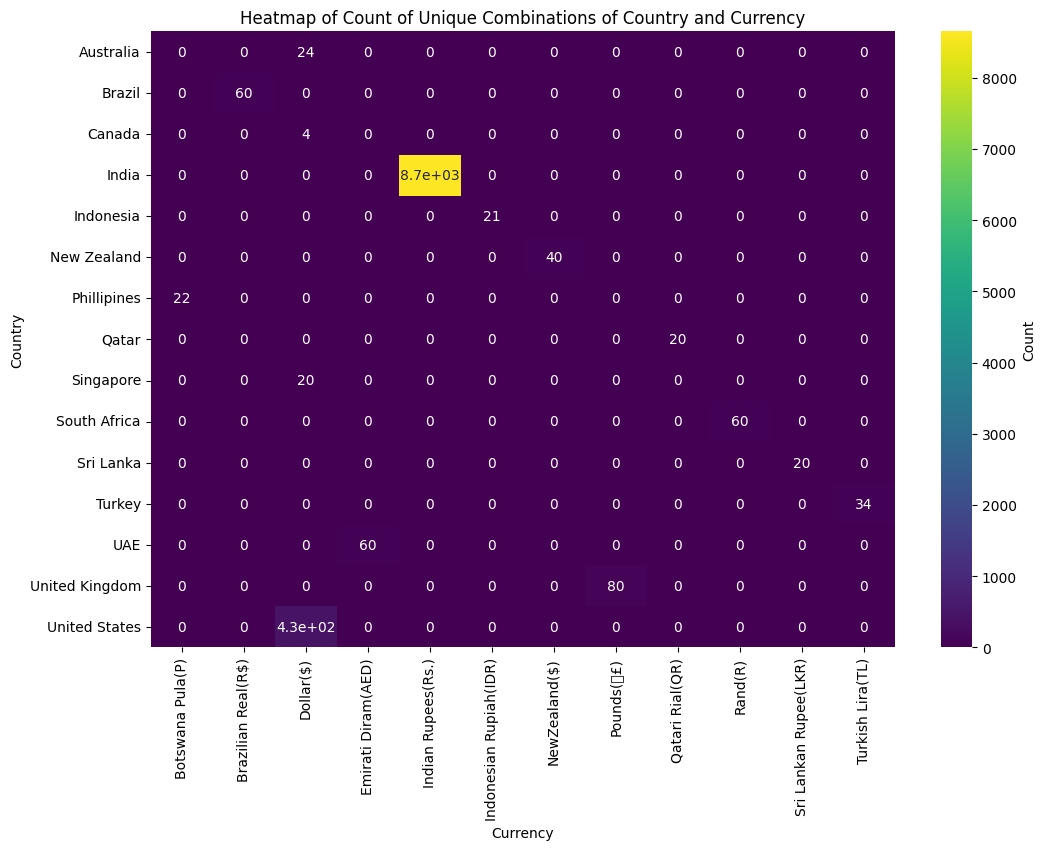

In [44]:
heatmap_data = most_curr.pivot_table(index='Country', columns='Currency', values='Count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Count of Unique Combinations of Country and Currency')
plt.show()



## Observation : Currency Most used in India Currency, So zomato earns most from the india!!

C:\Users\Nishant\AppData\Local\Temp\ipykernel_9484\3142798648.py:44: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()  # Ensures labels are not cut off
C:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


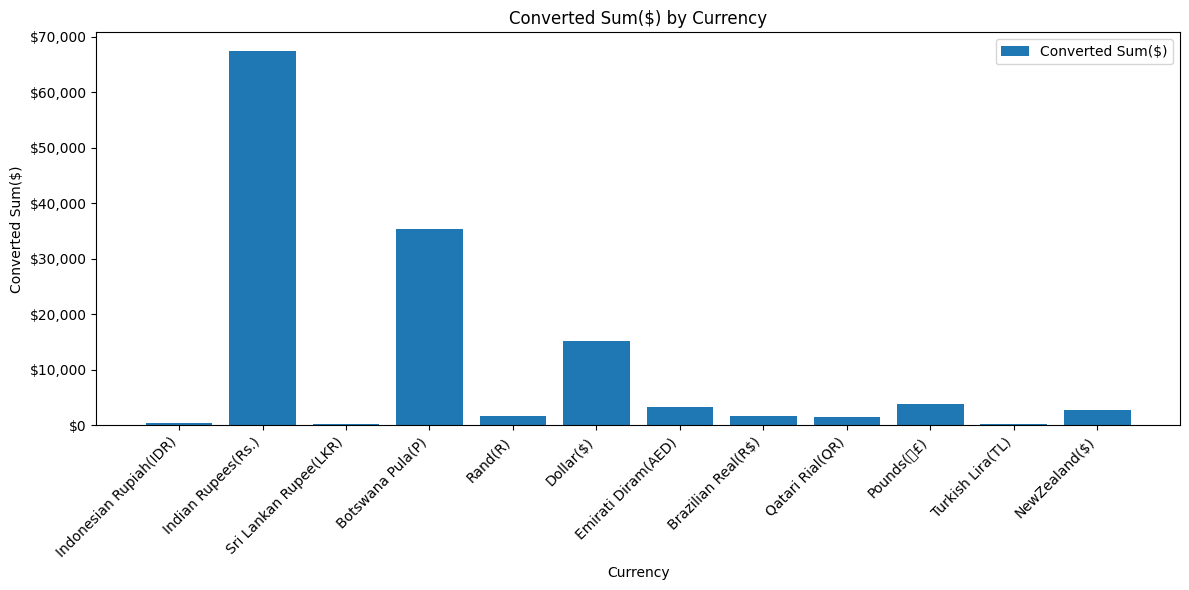

In [47]:

final_sales = final_df.groupby('Currency')['Average Cost for two'].sum().sort_values(ascending=False)
sum_column = final_sales.reset_index()[['Currency', 'Average Cost for two']]
# print(sum_column)
conversion_rates = {
    'Botswana Pula(P)': {'currency': 'Botswana Pula(P)', 'rate': 1},
    'Brazilian Real(R$)': {'currency': 'Brazilian Real(R$)', 'rate': 5},
    'Dollar($)': {'currency': 'Dollar($)', 'rate': 1},
    'Emirati Diram(AED)': {'currency': 'Emirati Dirham(AED)', 'rate': 3},
    'Indian Rupees(Rs.)': {'currency': 'Indian Rupees(Rs.) ', 'rate': 80},
    'Indonesian Rupiah(IDR)': {'currency': 'Indonesian Rupiah(IDR)', 'rate': 15000},
    'NewZealand($)': {'currency': 'NewZealand($)', 'rate': 1},
    'Pounds(£)': {'currency': 'Pounds(£)', 'rate': 1},
    'Qatari Rial(QR)': {'currency': 'Qatari Rial(QR)', 'rate': 3},
    'Rand(R)': {'currency': 'Rand(R)', 'rate': 15},
    'Turkish Lira(TL)': {'currency': 'Turkish Lira(TL)', 'rate': 15},
    'Sri Lankan Rupee(LKR)': {'currency': ' Sri Lankan Rupee(LKR)', 'rate': 200},
}

conversion_df = pd.DataFrame(list(conversion_rates.values()), index=conversion_rates.keys())

sum_column['Converted Sum($)'] = 0.0

for index, row in sum_column.iterrows():
    currency = row['Currency']
    conversion_rate = conversion_df.loc[currency, 'rate']
    sum_column.at[index, 'Converted Sum($)'] = row['Average Cost for two'] / conversion_rate

# print(sum_column[['Currency', 'Average Cost for two', 'Converted Sum($)']])
fig, ax = plt.subplots()
bar_width = 0.8  # Adjust the bar width as needed

# Bar for 'Converted Sum($)'
bars = ax.bar(sum_column['Currency'], sum_column['Converted Sum($)'], bar_width, label='Converted Sum($)', tick_label=sum_column['Currency'])

ax.set_xlabel('Currency')
ax.set_ylabel('Converted Sum($)')
ax.set_xticklabels(sum_column['Currency'], rotation=45, ha='right')  # Rotate x-axis labels

ax.set_title('Converted Sum($) by Currency')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))  # Format y-axis labels as integers with commas

ax.legend()
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

### Observation: The profit made by each country was different in thier currencies, now u can easily get insight of profit in dollar

In [25]:
print("Top Restaurants in a City-Wise")
count = 0
for city, rest , rating in zip(final_df['City'],final_df['Restaurant Name'], final_df['Aggregate rating']):
    if rating >= 4.5:
        print( rest," -- ", city)
        count += 1
        if count == 20:
            break

Top Restaurants in a City-Wise
Le Petit Souffle  --  Makati City
Izakaya Kikufuji  --  Makati City
Ooma  --  Mandaluyong City
Sambo Kojin  --  Mandaluyong City
Spiral - Sofitel Philippine Plaza Manila  --  Pasay City
Locavore  --  Pasig City
Silantro Fil-Mex  --  Pasig City
Silantro Fil-Mex  --  Quezon City
Balay Dako  --  Tagaytay City
Hobing Korean Dessert Cafe  --  Taguig City
NIU by Vikings  --  Taguig City
The Food Hall by Todd English  --  Taguig City
Coco Bambu  --  Brasí_lia
Confeitaria Colombo  --  Rio de Janeiro
Bibi  --  Rio de Janeiro
Cervantes  --  Rio de Janeiro
TT Burger  --  Rio de Janeiro
Braseiro da Gíçvea  --  Rio de Janeiro
Balada Mix  --  Rio de Janeiro
Garota de Ipanema  --  Rio de Janeiro


           City                Restaurant Name
580   Abu Dhabi                   Punjab Grill
637        Agra                Sheroes Hangout
653   Ahmedabad                       Cryo Lab
89       Albany  Guang Zhou Chinese Restaurant
680   Allahabad                         Eat On
701    Amritsar         Gurdas Ram Jalebi Wala
9524     Ankara                   Gaga Manjero
102    Armidale                Whitebull Hotel
105      Athens                      Sr. Sol 1
9299   Auckland                          Milse


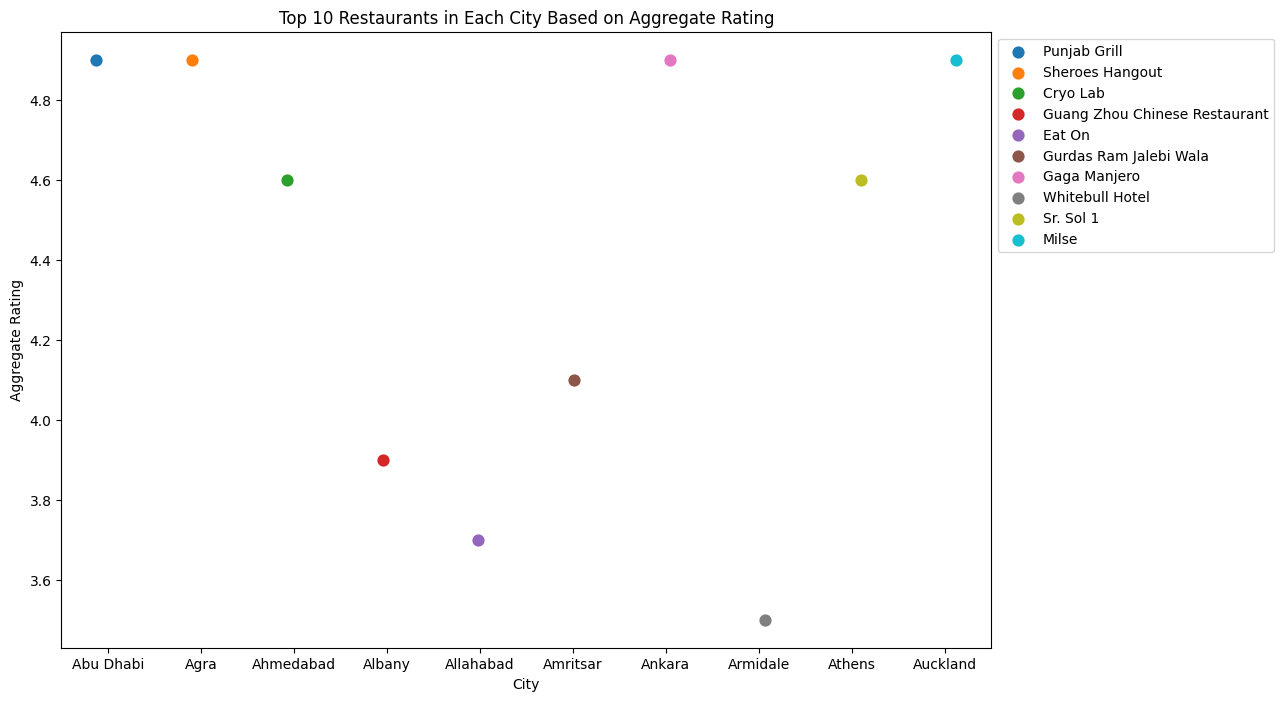

In [26]:

top_restaurants = final_df.loc[final_df.groupby(['City', 'Restaurant Name'][:1])['Aggregate rating'].idxmax()][:10]
print(top_restaurants[['City', 'Restaurant Name']])
plt.figure(figsize=(12, 8))
sns.pointplot(x='City', y='Aggregate rating', data=top_restaurants, hue='Restaurant Name', dodge=True, join=False)
plt.xlabel('City')
plt.ylabel('Aggregate Rating')
plt.title('Top 10 Restaurants in Each City Based on Aggregate Rating')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## Observation : From this insight you can just check the top restaurant of city"

In [27]:
final_df[['Restaurant Name', 'Aggregate rating']].value_counts().reset_index(name='Count')

,Restaurant Name,Aggregate rating,Count
0,Cafe Coffee Day,0.0,16
1,McDonald's,3.4,12
2,Baskin Robbins,0.0,12
3,Aggarwal Sweets,0.0,10
4,Cafe Coffee Day,3.1,10
...,...,...,...
8708,Fuji Japanese Restaurant,4.0,1
8709,Fuji Bay Japanese Restaurant,3.7,1
8710,Fuel Diet Cafe,0.0,1
8711,Fudged,3.0,1


In [28]:
final_df.iloc[:,:20]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good


In [29]:
rating =final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename (columns={0: 'Rating Count'})
print(rating)

    Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Av

## Observation :
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

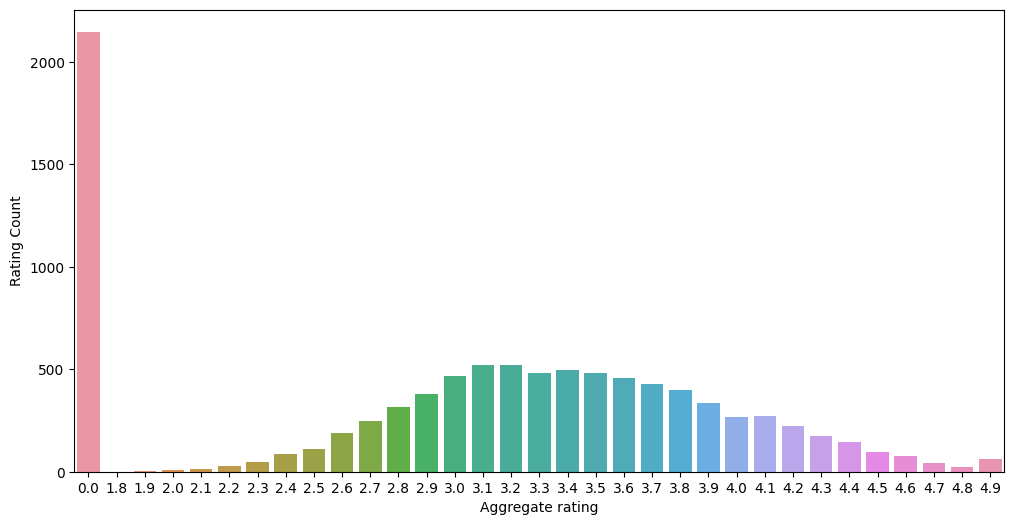

In [30]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot (x="Aggregate rating", y="Rating Count", data=rating)


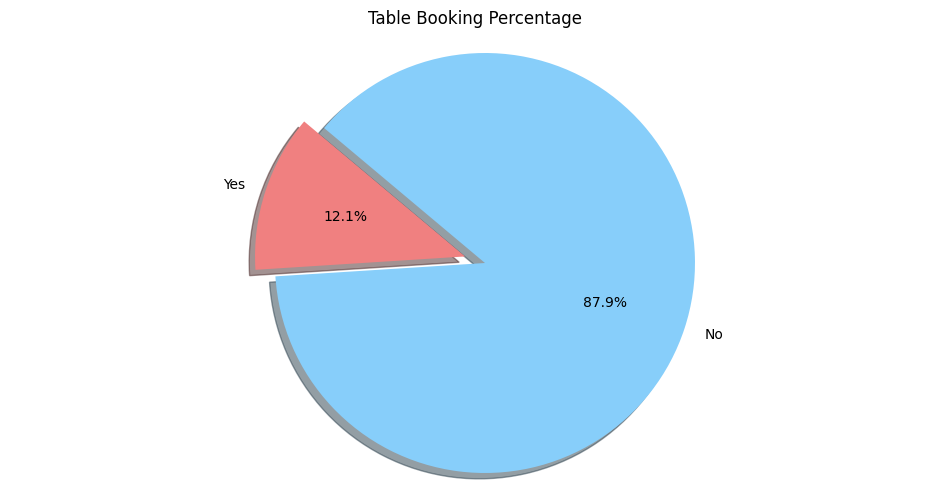

In [31]:

booking_counts = final_df['Has Table booking'].value_counts()

labels = ['Yes', 'No']
sizes = [booking_counts['Yes'], booking_counts['No']]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.title('Table Booking Percentage')
plt.show()


Has Online delivery
No     9790327
Yes    1663335
Name: Average Cost for two, dtype: int64
11453662
Profit Percentage made by Restaurent mode-wise Has Online delivery
No     85.477701
Yes    14.522299
Name: Average Cost for two, dtype: float64


Text(0, 0.5, 'Percentage')

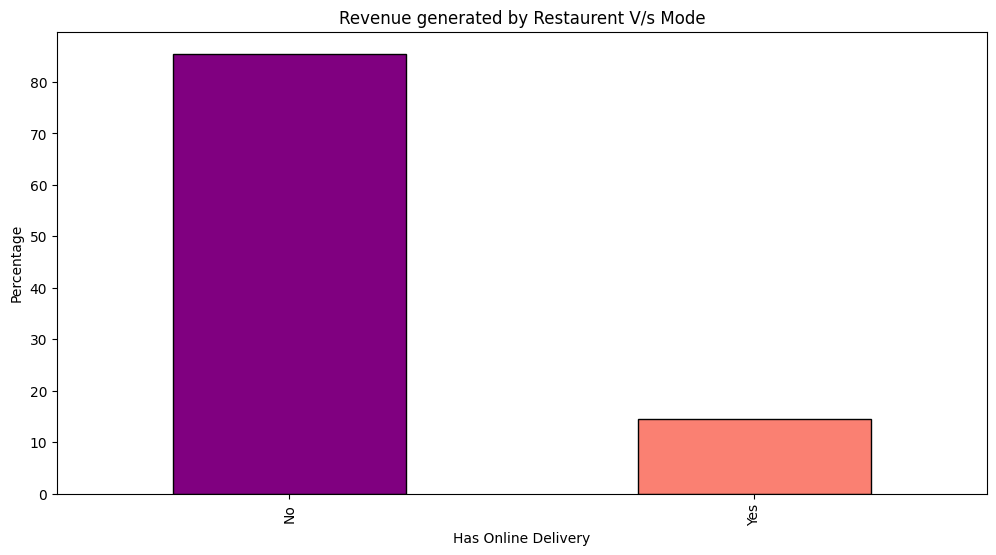

In [32]:
Profit_sum=final_df.groupby('Has Online delivery')['Average Cost for two'].sum()
print(Profit_sum)
total_sum = final_df['Average Cost for two'].sum()
Percentage = (Profit_sum/total_sum)*100
print(total_sum)
print("Profit Percentage made by Restaurent mode-wise",Percentage)
Percentage.plot(kind='bar', color=['Purple', 'salmon'], edgecolor='black')
plt.title('Revenue generated by Restaurent V/s Mode')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')


## Observation : Generated revenue comes from offline mode for zomato!!

In [33]:
Cusines_count=final_df.groupby('Cuisines')['Restaurant Name'].size()
print(Cusines_count)

Cuisines
Afghani                                      4
Afghani, Mughlai, Chinese                    1
Afghani, North Indian                        1
Afghani, North Indian, Pakistani, Arabian    1
African                                      1
                                            ..
Western, Asian, Cafe                         1
Western, Fusion, Fast Food                   1
World Cuisine                                1
World Cuisine, Mexican, Italian              1
World Cuisine, Patisserie, Cafe              1
Name: Restaurant Name, Length: 1825, dtype: int64


{'Afghani': 14, 'North Indian': 5, 'Pakistani': 4, 'Indian': 3, 'Mughlai': 3, 'Chinese': 2, 'Hyderabadi': 1, 'Arabian': 1, 'Fast Food': 1, 'Curry': 1}


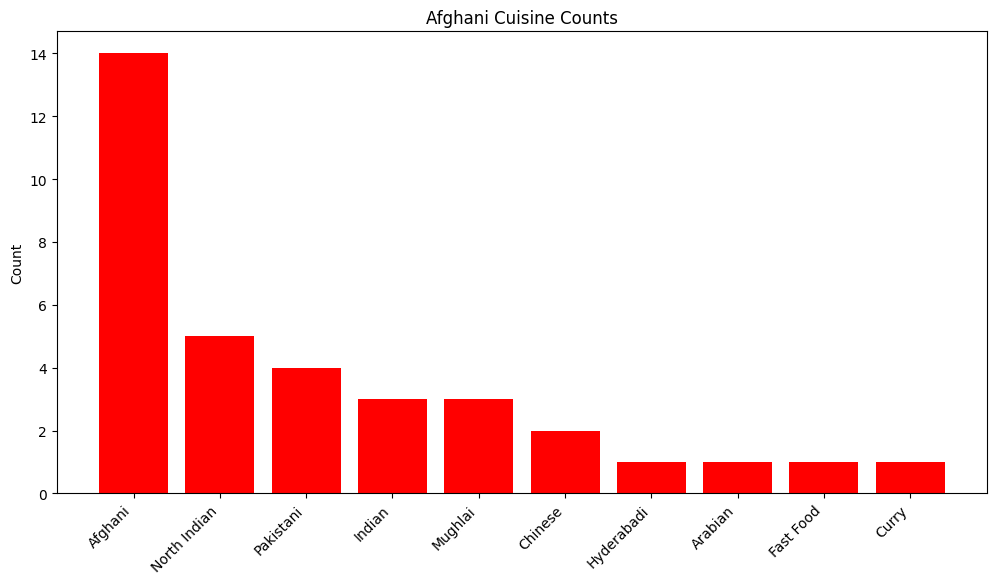

In [39]:
from collections import Counter

cuisines_counter = Counter()

for cuisines_str in final_df['Cuisines']:
    cuisines_str = '' if pd.isna(cuisines_str) else cuisines_str
    cuisines_list = cuisines_str.split(', ')
    if 'Afghani' in cuisines_list:
        cuisines_counter.update(cuisines_list)

result = {cuisine: count for cuisine, count in cuisines_counter.items() if count >= 1}

sorted_result = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))

print(sorted_result)

fig, ax = plt.subplots()
ax.bar(sorted_result.keys(), sorted_result.values(),color='red' )
ax.set_ylabel('Count')
ax.set_title('Afghani Cuisine Counts')
plt.xticks(rotation=45, ha='right')  
plt.show()


## End of report!!
### Hope insights are useful for you!!